# Laboratory Exercise 3 - Neural Networks

In [1]:
##import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
sns.set_style('whitegrid')

A neural network was created that solves the parity pattern using EBP method.

In [2]:
class NeuralNet():
    
    def __init__(self, X, y, input_size=2, alpha=0.1, epochs=1000):
        # input_size = number of input neurons
        # output_size = number of output neuron
        self.X = X.T
        self.y = y.reshape(1, -1)
        self.m = X.shape[0]
        self.output_size = X.shape[1]
        self.input_size = input_size
        self.alpha = alpha
        self.epochs = epochs
        self.loss_vals = []
        
        np.random.seed(1)
        self.weights = np.random.rand(self.input_size, self.output_size)
        self.bias = np.random.rand(1, input_size)
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    # Forward propagation
    def ForwardProp(self, X):
        z1 = np.dot(self.weights, X)
        a1 = self.sigmoid(z1)    
        z2 = np.dot(self.bias, a1)
        a2 = self.sigmoid(z2)
        return z1, a1, z2, a2

    # Backward propagation
    def BackProp(self, z1, a1, z2, a2):
        dz2 = a2 - self.y
        dbias = np.dot(dz2, a1.T) / self.m
        dz1 = np.dot(self.bias.T, dz2) * a1 * (1 - a1)
        dweights = np.dot(dz1, self.X.T) / self.m
        dweights = np.reshape(dweights, self.weights.shape)
        dbias = np.reshape(dbias, self.bias.shape)
        return dz1, dweights, dz2, dbias
    
    #trains the neural network
    def train(self):
        for _ in range(self.epochs):
            z1, a1, z2, a2 = self.ForwardProp(self.X)
            dz1, dweights, da2, dbias, = self.BackProp(z1, a1, z2, a2)
            self.loss = -(1 / self.m) * np.sum(self.y * np.log(a2)+(1 - self.y) * np.log(1 - a2))
            self.loss_vals.append(self.loss)
            self.weights = self.weights - self.alpha * dweights
            self.bias = self.bias - self.alpha * dbias
    
    #loss value
    def loss(self):
        return self.loss
    
    #plotting the loss value vs epoch
    def loss_plot(self):
        plt.plot(self.loss_vals)
        plt.title('Loss value vs epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Loss value')
        plt.grid(True)
        plt.show()
            
    #predicting the results
    def predict(self, X_test):
        results = []
        for Xn in X_test:
            Xn = Xn.T
            _, _, _, a2 = self.ForwardProp(Xn)
            if a2 >= 0.5:
                results.append(1)
            else:
                results.append(0)
        return np.array(results)

## Testing the neural network on parity patterns (N=2)

### Creating the data

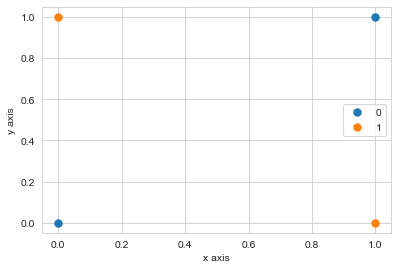

In [3]:
X = np.array(list(product(range(2), repeat=2))).reshape(-1,2)
y = X.sum(axis=1) % 2

X = np.array(list(product(range(2), repeat=2))).reshape(-1,2)
y = X.sum(axis=1) % 2

plt.figure(dpi=75)
plt.scatter(X[X.sum(axis=1)%2 == 0][:, 0], X[X.sum(axis=1)%2 == 0][:, 1], c='C0', s=50, label='0')
plt.scatter(X[X.sum(axis=1)%2 == 1][:, 0], X[X.sum(axis=1)%2 == 1][:, 1], c='C1', s=50, label='1')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend(loc='best')
plt.show()

### Training the Neural Network

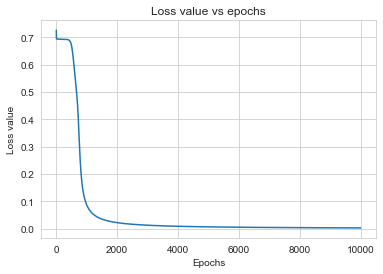

In [4]:
parity2 = NeuralNet(X, y, input_size=3, alpha=1, epochs=10000)
parity2.train()
parity2.loss_plot()

### Testing the neural network

In [5]:
X_test = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_pred = parity2.predict(X_test)
for i in range(len(X_test)):
    print('Test sample: {}\nPrediction: {}'.format(X_test[i], y_pred[i]))
    if i != len(X_test):
        print('\n')

Test sample: [0 0]
Prediction: 0


Test sample: [0 1]
Prediction: 1


Test sample: [1 0]
Prediction: 1


Test sample: [1 1]
Prediction: 0




### Evaluating performance of the neural network

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
print('Confusion matrix:\n{}'.format(confusion_matrix(y, y_pred)))
print('\n')
print('Classification report:\n{}'.format(classification_report(y, y_pred)))

Confusion matrix:
[[2 0]
 [0 2]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



## Testing the neural network on parity patterns (N=3)

### Creating the data

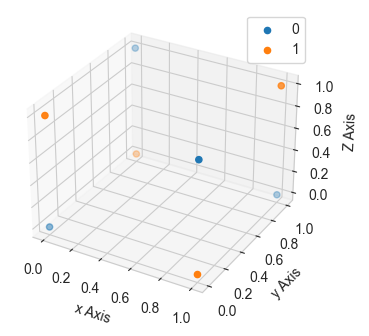

In [7]:
X = np.array(list(product(range(2), repeat=3))).reshape(-1,3)
y = X.sum(axis=1) % 2

X = np.array(list(product(range(2), repeat=3))).reshape(-1,3)
y = X.sum(axis=1) % 2

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X.sum(axis=1)%2 == 0][:, 0], X[X.sum(axis=1)%2 == 0][:, 1], X[X.sum(axis=1)%2 == 0][:, 2], c='C0', label='0')
ax.scatter(X[X.sum(axis=1)%2 == 1][:, 0], X[X.sum(axis=1)%2 == 1][:, 1], X[X.sum(axis=1)%2 == 1][:, 2], c='C1', label='1')
ax.set_xlabel('x Axis')
ax.set_ylabel('y Axis')
ax.set_zlabel('Z Axis')
plt.legend(loc='best')
plt.show()

### Training the neural network on the data

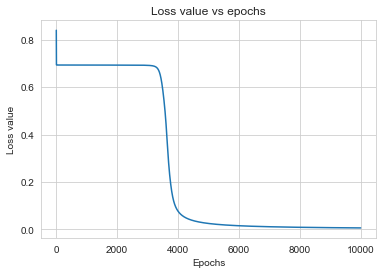

In [8]:
parity3 = NeuralNet(X, y, input_size=4, alpha=1, epochs=10000)
parity3.train()
parity3.loss_plot()

### Testing the neural network

In [9]:
X_test = np.array([[0, 0, 0],
                   [0, 0, 1],
                   [0, 1, 0],
                   [0, 1, 1],
                   [1, 0, 0],
                   [1, 0, 1],
                   [1, 1, 0],
                   [1, 1, 1]])
y_pred = parity3.predict(X_test)

for i in range(len(X_test)):
    print('Test sample: {}\nPrediction: {}'.format(X_test[i], y_pred[i]))
    if i != len(X_test):
        print('\n')

Test sample: [0 0 0]
Prediction: 0


Test sample: [0 0 1]
Prediction: 1


Test sample: [0 1 0]
Prediction: 1


Test sample: [0 1 1]
Prediction: 0


Test sample: [1 0 0]
Prediction: 1


Test sample: [1 0 1]
Prediction: 0


Test sample: [1 1 0]
Prediction: 0


Test sample: [1 1 1]
Prediction: 1




### Evaluating performance of the neural network

In [10]:
print('Confusion matrix:\n{}'.format(confusion_matrix(y, y_pred)))
print('\n')
print('Classification report:\n{}'.format(classification_report(y, y_pred)))

Confusion matrix:
[[4 0]
 [0 4]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



## Testing the neural network on parity patterns (N=4)

### Creating the data

In [11]:
X = np.array(list(product(range(2), repeat=4))).reshape(-1,4)
y = X.sum(axis=1) % 2

### Training the neural network on the data

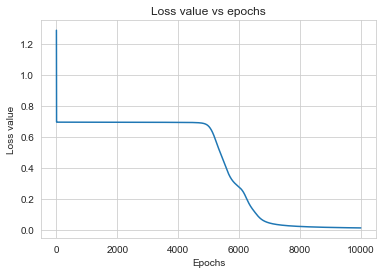

In [12]:
parity4 = NeuralNet(X, y, input_size=5, alpha=1, epochs=10000)
parity4.train()
parity4.loss_plot()

### Testing the neural network

In [13]:
X_test = np.array([[0, 0, 0, 0],
                   [0, 0, 0, 1],
                   [0, 0, 1, 0],
                   [0, 0, 1, 1],
                   [0, 1, 0, 0],
                   [0, 1, 0, 1],
                   [0, 1, 1, 0],
                   [0, 1, 1, 1],
                   [1, 0, 0, 0],
                   [1, 0, 0, 1],
                   [1, 0, 1, 0],
                   [1, 0, 1, 1],
                   [1, 1, 0, 0],
                   [1, 1, 0, 1],
                   [1, 1, 1, 0],
                   [1, 1, 1, 1]])
y_pred = parity4.predict(X_test)

for i in range(0, len(X_test), 2):
    print('Test sample: {}\nPrediction: {}'.format(X_test[i], y_pred[i]))
    if i != len(X_test):
        print('\n')

Test sample: [0 0 0 0]
Prediction: 0


Test sample: [0 0 1 0]
Prediction: 1


Test sample: [0 1 0 0]
Prediction: 1


Test sample: [0 1 1 0]
Prediction: 0


Test sample: [1 0 0 0]
Prediction: 1


Test sample: [1 0 1 0]
Prediction: 0


Test sample: [1 1 0 0]
Prediction: 0


Test sample: [1 1 1 0]
Prediction: 1




### Evaluating performance of the neural network

In [14]:
print('Confusion matrix:\n{}'.format(confusion_matrix(y, y_pred)))
print('\n')
print('Classification report:\n{}'.format(classification_report(y, y_pred)))

Confusion matrix:
[[8 0]
 [0 8]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



## Neural network on parity patterns (N=5)

### Creating the data

In [15]:
X = np.array(list(product(range(2), repeat=5))).reshape(-1,5)
y = X.sum(axis=1) % 2

### Training the neural network on the data

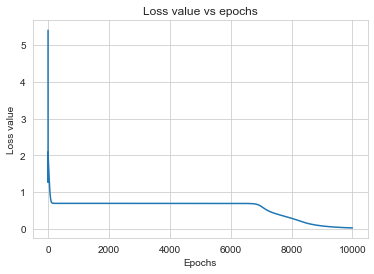

In [16]:
parity5 = NeuralNet(X, y, input_size=30, alpha=1, epochs=10000)
parity5.train()
parity5.loss_plot()

### Testing the neural network

In [17]:
X_test = np.array([[0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 1, 0],
              [0, 0, 0, 1, 1],
              [0, 0, 1, 0, 0],
              [0, 0, 1, 0, 1],
              [0, 0, 1, 1, 0],
              [0, 0, 1, 1, 1],
              [0, 1, 0, 0, 0],
              [0, 1, 0, 0, 1],
              [0, 1, 0, 1, 0],
              [0, 1, 0, 1, 1],
              [0, 1, 1, 0, 0],
              [0, 1, 1, 0, 1],
              [0, 1, 1, 1, 0],
              [0, 1, 1, 1, 1],
              [1, 0, 0, 0, 0],
              [1, 0, 0, 0, 1],
              [1, 0, 0, 1, 0],
              [1, 0, 0, 1, 1],
              [1, 0, 1, 0, 0],
              [1, 0, 1, 0, 1],
              [1, 0, 1, 1, 0],
              [1, 0, 1, 1, 1],
              [1, 1, 0, 0, 0],
              [1, 1, 0, 0, 1],
              [1, 1, 0, 1, 0],
              [1, 1, 0, 1, 1],
              [1, 1, 1, 0, 0],
              [1, 1, 1, 0, 1],
              [1, 1, 1, 1, 0],
              [1, 1, 1, 1, 1]])
y_pred = parity5.predict(X_test)

for i in range(0, len(X_test), 2):
    print('Test sample: {}\nPrediction: {}'.format(X_test[i], y_pred[i]))
    if i != len(X_test):
        print('\n')

Test sample: [0 0 0 0 0]
Prediction: 0


Test sample: [0 0 0 1 0]
Prediction: 1


Test sample: [0 0 1 0 0]
Prediction: 1


Test sample: [0 0 1 1 0]
Prediction: 0


Test sample: [0 1 0 0 0]
Prediction: 1


Test sample: [0 1 0 1 0]
Prediction: 0


Test sample: [0 1 1 0 0]
Prediction: 0


Test sample: [0 1 1 1 0]
Prediction: 1


Test sample: [1 0 0 0 0]
Prediction: 1


Test sample: [1 0 0 1 0]
Prediction: 0


Test sample: [1 0 1 0 0]
Prediction: 0


Test sample: [1 0 1 1 0]
Prediction: 1


Test sample: [1 1 0 0 0]
Prediction: 0


Test sample: [1 1 0 1 0]
Prediction: 1


Test sample: [1 1 1 0 0]
Prediction: 1


Test sample: [1 1 1 1 0]
Prediction: 0




### Evaluating performance of the neural network

In [18]:
print('Confusion matrix:\n{}'.format(confusion_matrix(y, y_pred)))
print('\n')
print('Classification report:\n{}'.format(classification_report(y, y_pred)))

Confusion matrix:
[[16  0]
 [ 0 16]]


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32

